# EDA


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# read data

DATA_DIR = "data"
train_data = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
train_pair = train_data[["user_id", "item_id"]].values
train_rating = train_data[["rating"]].values
test_data = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
test = test_data[["user_id", "item_id"]].values
user_feats = pd.read_csv(os.path.join(DATA_DIR, "user_feats.csv"))
item_feats = pd.read_csv(os.path.join(DATA_DIR, "item_feats.csv"))

In [2]:
# data types
print("Training data:")
print(train_data.head())
print(train_data.dtypes)
print()
print("Test data:")
print(test_data.head())
print(test_data.dtypes)

Training data:
   user_id  item_id    rating
0       16       19  2.827834
1       16      245  2.894483
2        8      186  3.272811
3       37      136  4.162128
4       54       10  4.766408
user_id      int64
item_id      int64
rating     float64
dtype: object

Test data:
   user_id  item_id
0       41       82
1       99      240
2       41      206
3       43      244
4       56      146
user_id    int64
item_id    int64
dtype: object


In [ ]:
# number of users and items
num_user = max(train_data["user_id"].max(), test_data["user_id"].max()) + 1
num_item = max(train_data["item_id"].max(), test_data["item_id"].max()) + 1
print(f"{num_user=}")
print(f"{num_item=}")

num_user=100
num_item=300


## Some basic plots


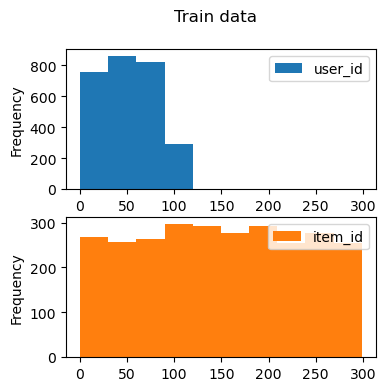

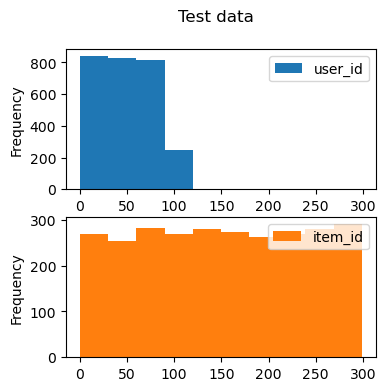

array([<Axes: xlabel='Train data rating', ylabel='Frequency'>],
      dtype=object)

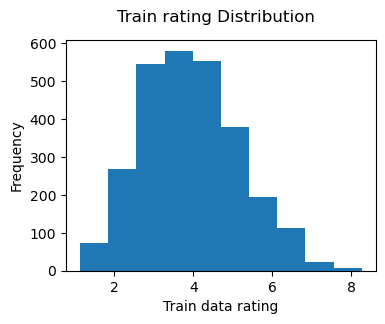

In [ ]:
# separating user_id and item_id from ratings since there scales are different
train_data[["user_id", "item_id"]].plot(
    kind="hist",
    subplots=True,
    sharex=False,
    sharey=False,
    title="Train data",
    figsize=(4, 4),
)
test_data.plot(
    kind="hist",
    subplots=True,
    sharex=False,
    sharey=False,
    title="Test data",
    figsize=(4, 4),
)
plt.show()
train_data["rating"].plot(
    kind="hist",
    subplots=True,
    xlabel="Train data rating",
    figsize=(4, 3),
    title="Train rating Distribution",
)

<Axes: xlabel='item_id', ylabel='rating'>

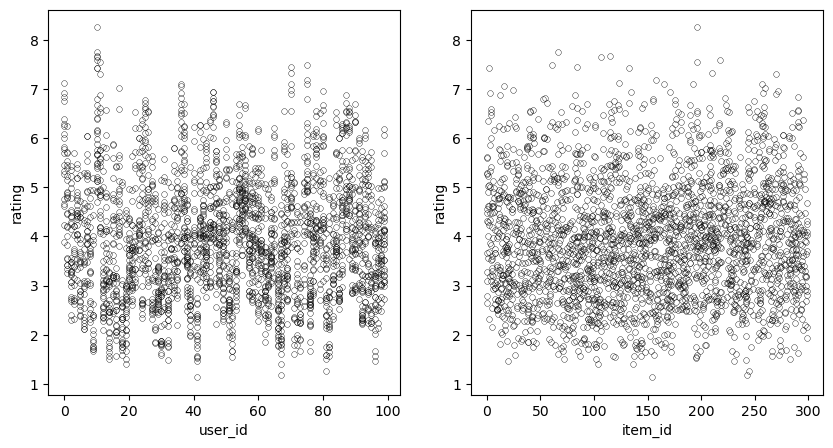

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
train_data[["user_id", "rating"]].plot(
    kind="scatter",
    x="user_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
    ax=axes[0],
)
train_data[["item_id", "rating"]].plot(
    kind="scatter",
    x="item_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
    ax=axes[1],
)

\*Conclusion: Not much of information from these plots


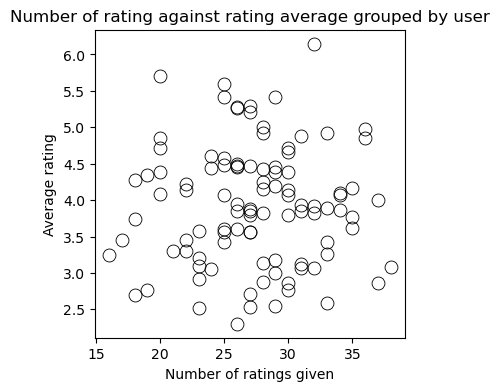

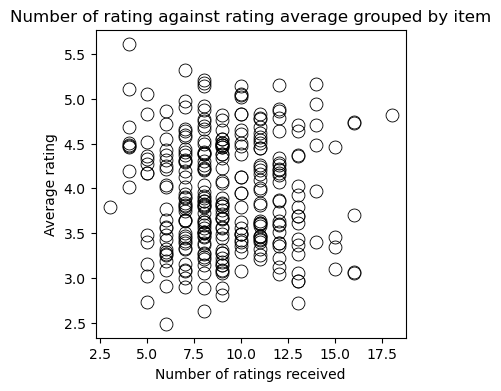

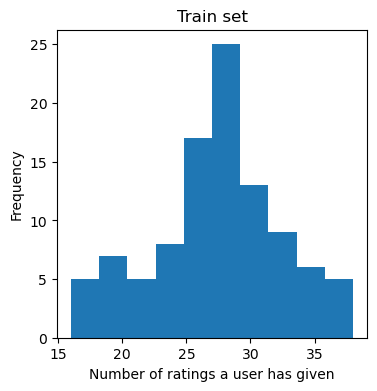

Text(0.5, 0, 'Number of ratings a user has given')

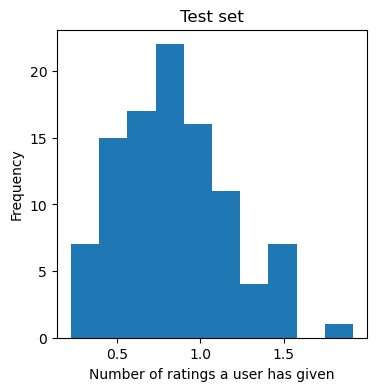

In [ ]:
ax = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by user",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
        figsize=(4, 4),
    )
)
ax.set_xlabel("Number of ratings given")
ax.set_ylabel("Average rating")
ax2 = (
    train_data[["item_id", "rating"]]
    .groupby("item_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by item",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
        figsize=(4, 4),
    )
)
ax2.set_xlabel("Number of ratings received")
ax2.set_ylabel("Average rating")
plt.show()
ax3 = train_data["user_id"].value_counts().plot(kind="hist", figsize=(4, 4))
ax3.set_title("Train set")
ax3.set_xlabel("Number of ratings a user has given")
plt.show()
ax4 = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")["rating"]
    .var()
    .plot(kind="hist", figsize=(4, 4))
)
ax4.set_title("Test set")
ax4.set_xlabel("Number of ratings a user has given")

\*Conclusion: Not much information from frequency of ratings or popularity of items


## Popular items/users


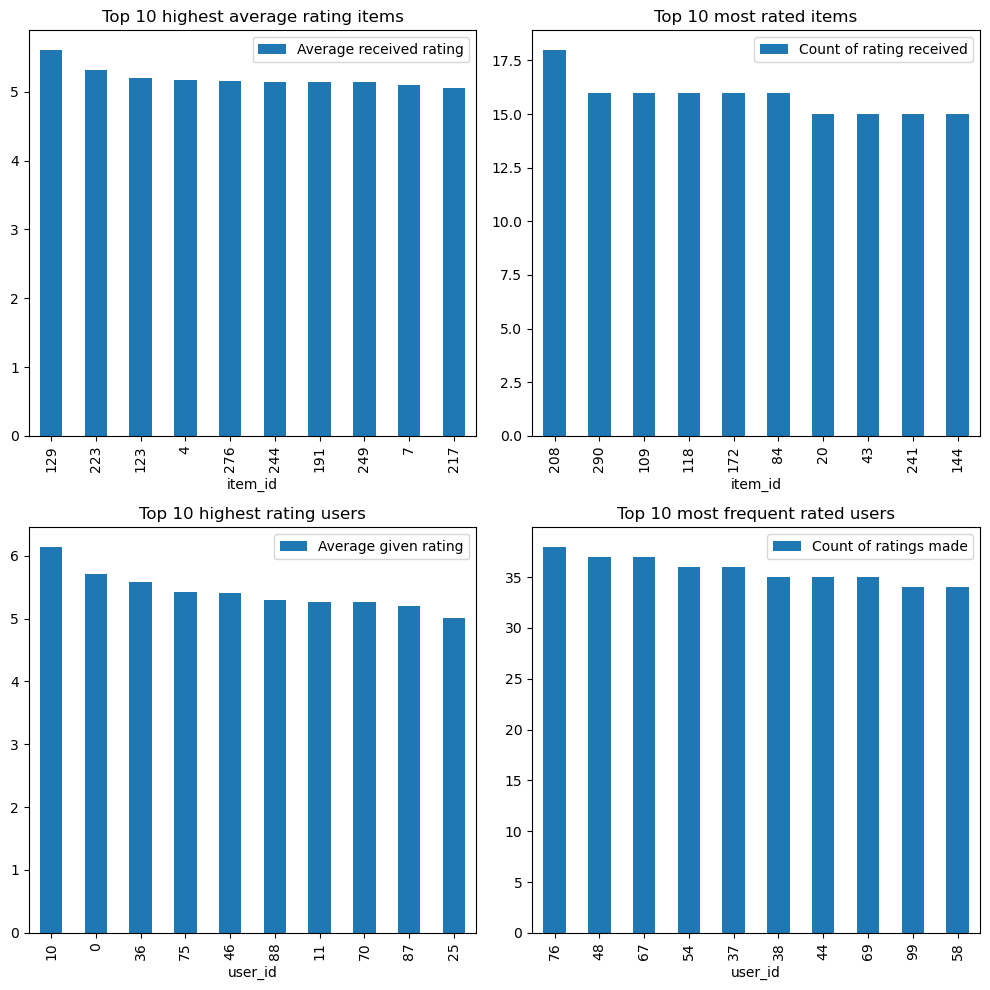

In [ ]:
TOP_K = 10

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
train_data[["item_id", "rating"]].groupby("item_id").mean().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(
    kind="bar", ax=axes[0], title=f"Top {TOP_K} highest average rating items"
)
axes[0].legend(labels=["Average received rating"])

train_data[["item_id", "rating"]].groupby("item_id").count().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(kind="bar", ax=axes[1], title=f"Top {TOP_K} most rated items")
axes[1].legend(labels=["Count of rating received"])

train_data[["user_id", "rating"]].groupby("user_id").mean().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(kind="bar", ax=axes[2], title=f"Top {TOP_K} highest rating users")
axes[2].legend(labels=["Average given rating"])

train_data[["user_id", "rating"]].groupby("user_id").count().sort_values(
    "rating", ascending=False
).head(TOP_K).plot(
    kind="bar", ax=axes[3], title=f"Top {TOP_K} most frequent rated users"
)
axes[3].legend(labels=["Count of ratings made"])
fig.tight_layout()

## Plots on side information


<Axes: >

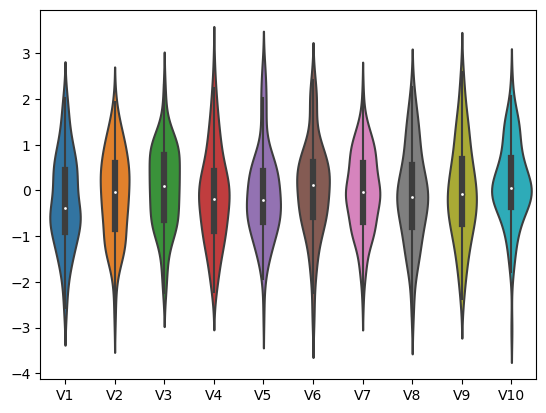

In [ ]:
# User side information violinplots
sns.violinplot(user_feats.drop("user_id", axis=1))

\*Conclusion: Not much information from user side information


<Axes: ylabel='Count'>

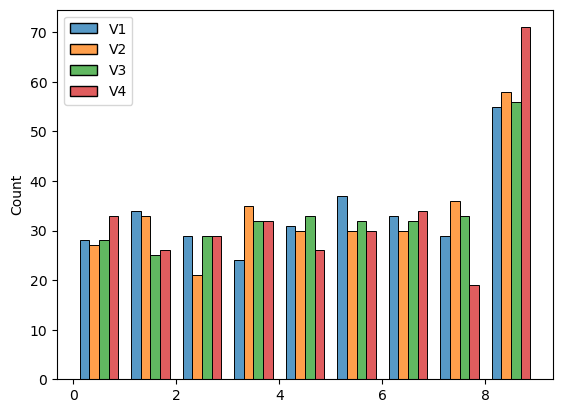

In [ ]:
# Item side information histogram plots
sns.histplot(
    item_feats.drop("item_id", axis=1),
    multiple="dodge",
    bins=9,
    shrink=0.75,
)

### Finding the missing piece

Below we are trying to fit a Matrix factorization between the embeddings of user_id and each item's side information in order to deduce which item side information is useful.


#### V1


Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.511 Obj: 9.632
Reg-MF: ite: 1; diff: 0.586 Obj: 3.991
Reg-MF: ite: 2; diff: 0.152 Obj: 3.383
Reg-MF: ite: 3; diff: 0.101 Obj: 3.041
Reg-MF: ite: 4; diff: 0.073 Obj: 2.818
Reg-MF: ite: 5; diff: 0.057 Obj: 2.658
Reg-MF: ite: 6; diff: 0.045 Obj: 2.537
Reg-MF: ite: 7; diff: 0.037 Obj: 2.443
Reg-MF: ite: 8; diff: 0.031 Obj: 2.368
Reg-MF: ite: 9; diff: 0.026 Obj: 2.307
Reg-MF: ite: 10; diff: 0.022 Obj: 2.256
Reg-MF: ite: 11; diff: 0.019 Obj: 2.213
Reg-MF: ite: 12; diff: 0.017 Obj: 2.176
Reg-MF: ite: 13; diff: 0.014 Obj: 2.145
Reg-MF: ite: 14; diff: 0.013 Obj: 2.118
Reg-MF: ite: 15; diff: 0.011 Obj: 2.094
Reg-MF: ite: 16; diff: 0.010 Obj: 2.073
Reg-MF: ite: 17; diff: 0.009 Obj: 2.054
Reg-MF: ite: 18; diff: 0.008 Obj: 2.037
Reg-MF: ite: 19; diff: 0.007 Obj: 2.023
Reg-MF: ite: 20; diff: 0.007 Obj: 2.009
Reg-MF: ite: 21; diff: 0.006 Obj: 1.997
Reg-MF: ite: 22; diff: 0.005 Obj: 1.987
Reg-MF: ite: 23; diff: 0.005 Obj: 1.977
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

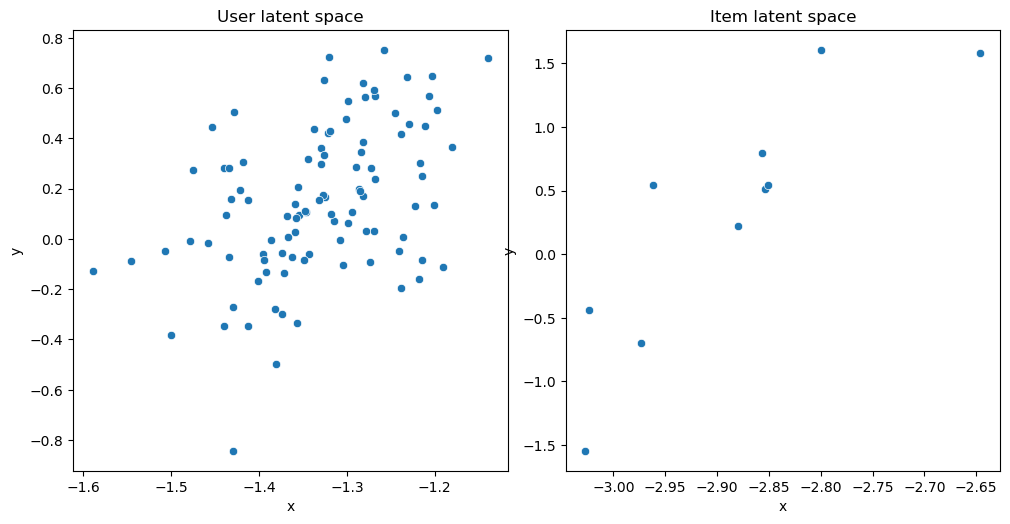

In [ ]:
latent_pair = merged_train[["user_id", "V1_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

### V2


Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.768 Obj: 4.125
Reg-MF: ite: 1; diff: 0.264 Obj: 3.034
Reg-MF: ite: 2; diff: 0.077 Obj: 2.801
Reg-MF: ite: 3; diff: 0.056 Obj: 2.643
Reg-MF: ite: 4; diff: 0.043 Obj: 2.530
Reg-MF: ite: 5; diff: 0.035 Obj: 2.441
Reg-MF: ite: 6; diff: 0.030 Obj: 2.367
Reg-MF: ite: 7; diff: 0.026 Obj: 2.305
Reg-MF: ite: 8; diff: 0.022 Obj: 2.254
Reg-MF: ite: 9; diff: 0.019 Obj: 2.210
Reg-MF: ite: 10; diff: 0.017 Obj: 2.173
Reg-MF: ite: 11; diff: 0.015 Obj: 2.141
Reg-MF: ite: 12; diff: 0.013 Obj: 2.113
Reg-MF: ite: 13; diff: 0.012 Obj: 2.089
Reg-MF: ite: 14; diff: 0.010 Obj: 2.067
Reg-MF: ite: 15; diff: 0.009 Obj: 2.048
Reg-MF: ite: 16; diff: 0.008 Obj: 2.032
Reg-MF: ite: 17; diff: 0.007 Obj: 2.017
Reg-MF: ite: 18; diff: 0.007 Obj: 2.003
Reg-MF: ite: 19; diff: 0.006 Obj: 1.991
Reg-MF: ite: 20; diff: 0.006 Obj: 1.980
Reg-MF: ite: 21; diff: 0.005 Obj: 1.970
Reg-MF: ite: 22; diff: 0.005 Obj: 1.961
Reg-MF: ite: 23; diff: 0.004 Obj: 1.953
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

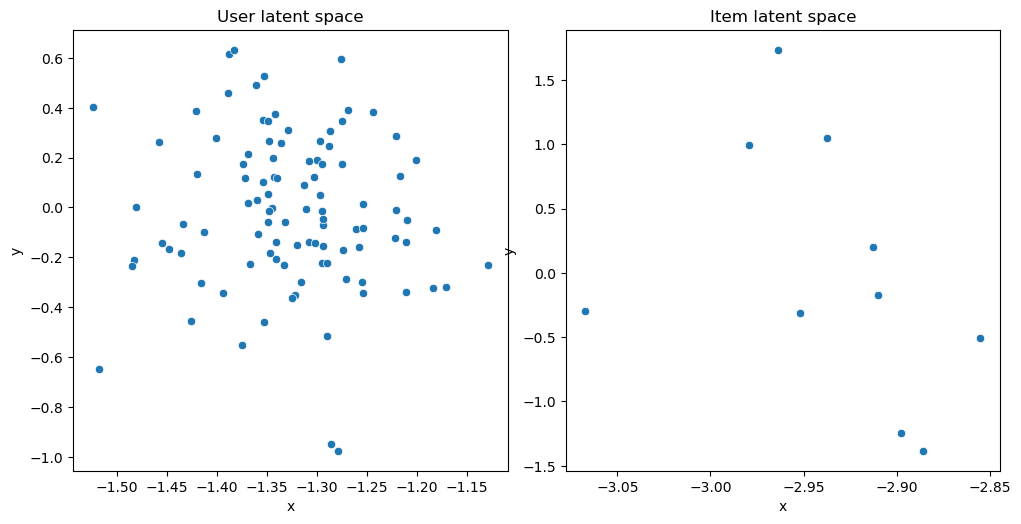

In [ ]:
latent_pair = merged_train[["user_id", "V2_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

### V3


Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.233 Obj: 13.915
Reg-MF: ite: 1; diff: 0.786 Obj: 2.975
Reg-MF: ite: 2; diff: 0.064 Obj: 2.785
Reg-MF: ite: 3; diff: 0.057 Obj: 2.627
Reg-MF: ite: 4; diff: 0.045 Obj: 2.509
Reg-MF: ite: 5; diff: 0.037 Obj: 2.417
Reg-MF: ite: 6; diff: 0.030 Obj: 2.344
Reg-MF: ite: 7; diff: 0.025 Obj: 2.284
Reg-MF: ite: 8; diff: 0.022 Obj: 2.235
Reg-MF: ite: 9; diff: 0.018 Obj: 2.194
Reg-MF: ite: 10; diff: 0.015 Obj: 2.160
Reg-MF: ite: 11; diff: 0.013 Obj: 2.133
Reg-MF: ite: 12; diff: 0.010 Obj: 2.111
Reg-MF: ite: 13; diff: 0.009 Obj: 2.092
Reg-MF: ite: 14; diff: 0.008 Obj: 2.075
Reg-MF: ite: 15; diff: 0.008 Obj: 2.059
Reg-MF: ite: 16; diff: 0.007 Obj: 2.044
Reg-MF: ite: 17; diff: 0.007 Obj: 2.030
Reg-MF: ite: 18; diff: 0.006 Obj: 2.017
Reg-MF: ite: 19; diff: 0.006 Obj: 2.005
Reg-MF: ite: 20; diff: 0.005 Obj: 1.994
Reg-MF: ite: 21; diff: 0.005 Obj: 1.984
Reg-MF: ite: 22; diff: 0.004 Obj: 1.975
Reg-MF: ite: 23; diff: 0.004 Obj: 1.967
Reg-MF: ite: 2

[Text(0.5, 1.0, 'Item latent space')]

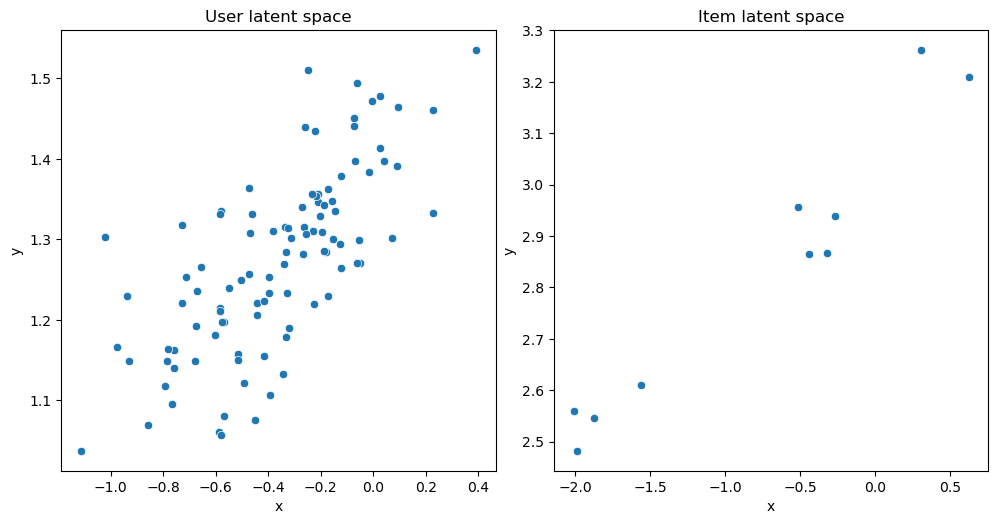

In [ ]:
latent_pair = merged_train[["user_id", "V3_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

### V4


Fitting Reg-MF: K: 2, lam: 0.00100
Reg-MF: ite: 0; diff: 0.677 Obj: 6.060
Reg-MF: ite: 1; diff: 0.380 Obj: 3.757
Reg-MF: ite: 2; diff: 0.137 Obj: 3.243
Reg-MF: ite: 3; diff: 0.094 Obj: 2.939
Reg-MF: ite: 4; diff: 0.069 Obj: 2.735
Reg-MF: ite: 5; diff: 0.054 Obj: 2.588
Reg-MF: ite: 6; diff: 0.043 Obj: 2.477
Reg-MF: ite: 7; diff: 0.035 Obj: 2.389
Reg-MF: ite: 8; diff: 0.029 Obj: 2.319
Reg-MF: ite: 9; diff: 0.025 Obj: 2.262
Reg-MF: ite: 10; diff: 0.021 Obj: 2.214
Reg-MF: ite: 11; diff: 0.018 Obj: 2.173
Reg-MF: ite: 12; diff: 0.016 Obj: 2.138
Reg-MF: ite: 13; diff: 0.014 Obj: 2.108
Reg-MF: ite: 14; diff: 0.012 Obj: 2.082
Reg-MF: ite: 15; diff: 0.011 Obj: 2.060
Reg-MF: ite: 16; diff: 0.010 Obj: 2.040
Reg-MF: ite: 17; diff: 0.009 Obj: 2.023
Reg-MF: ite: 18; diff: 0.007 Obj: 2.007
Reg-MF: ite: 19; diff: 0.007 Obj: 1.994
Reg-MF: ite: 20; diff: 0.006 Obj: 1.983
Reg-MF: ite: 21; diff: 0.005 Obj: 1.973
Reg-MF: ite: 22; diff: 0.004 Obj: 1.964
Reg-MF: ite: 23; diff: 0.004 Obj: 1.956
Reg-MF: ite: 24

[Text(0.5, 1.0, 'Item latent space')]

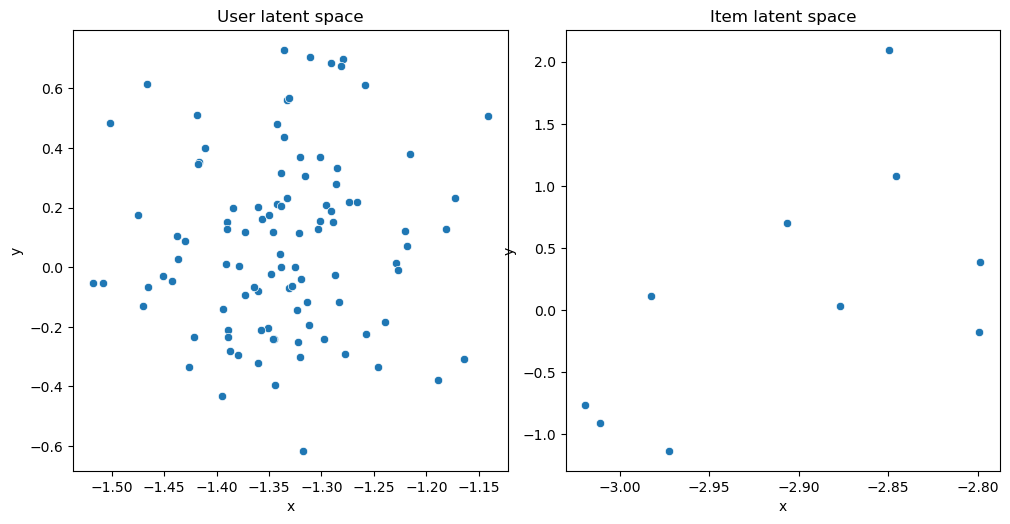

In [ ]:
latent_pair = merged_train[["user_id", "V4_item"]].values
mf = MF(num_user, 10, K=2)
mf.fit(latent_pair, train_rating)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.tight_layout()
sns.scatterplot(
    pd.DataFrame({"x": mf.P[:, 0], "y": mf.P[:, 1]}), x="x", y="y", ax=axes[0]
)
axes[0].set(title="User latent space")
sns.scatterplot(
    pd.DataFrame({"x": mf.Q[:, 0], "y": mf.Q[:, 1]}), x="x", y="y", ax=axes[1]
)
axes[1].set(title="Item latent space")

-   Conclusion: V3 seems to have a linear relationship => V3 is useful


# Model Development


## Basic Embedding MF

We first use a simple matrix factorization of the user and item latent factors, both with 10 dimensions as suggested by the description. The final results after training are:

-   Train rmse: 1.2406
-   Test rmse: 4.0903

=> Clearly the MF is overfitting


## MF + Phi

Next we try to add phi function in the network. After training, the results are as follows:

-   Train rmse: 1.23880
-   Test rmes: 1.6900

=> Test rmse still greater than sample submission...


## MF + Phi + Phi2

After that, we try to implement the second neural network, i.e. the second phi function. Results:

-   Train rmse: 1.7867
-   Test rmse: 1.1068

=> Interesting thing: test rmse smaller than train rmse.

Few trails on public leaderboard:

-   1.43011
-   1.43821


## MF + Phi + Phi2 + Psi

Next, we do the psi function. Results:

-   train rmse: 1.0435
    -test rmse: 1.014
    lowest public leaderboard:
-   1.37


## With V3

public leaderboard:

-   1.6217
    => Overfitted


# Results


rating 3.2342
Name: 53, dtype: float32


In [ ]:

rating item_id	
0	3.2342
671	3.2342
658	3.2342
659	3.2342
660	3.2342